In [13]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv("engineered_retail_raw.csv")
df.head()


,sales,price,discount,discount_impact,rolling_7day_sales,store_enc,product_enc,category_Electronics,category_Furniture,category_Grocery,season_Winter
0,120,15000,0.10,12.0,110,0,0,1,0,0,1
1,300,150,0.05,15.0,220,0,1,0,0,1,1
2,90,15000,0.15,13.5,100,1,0,1,0,0,1
3,200,1200,0.20,40.0,160,1,2,0,0,0,1
4,350,150,0.00,0.0,260,2,1,0,0,1,1


In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [16]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)


In [17]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([5.28039687e-01, 2.18744797e-01, 1.63047598e-01, 6.77283832e-02,
       1.50980208e-02, 4.24053211e-03, 3.02872766e-03, 7.22545849e-05,
       4.71629213e-34, 2.19229082e-34, 0.00000000e+00])

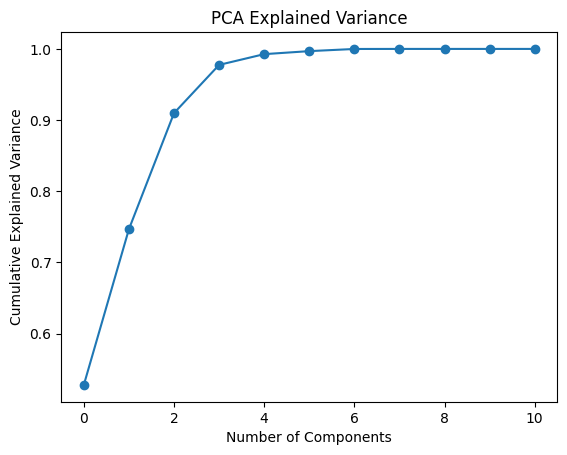

In [18]:
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


In [19]:
pca_2 = PCA(n_components=2)
pca_2_data = pca_2.fit_transform(scaled_data)

pca_df = pd.DataFrame(
    pca_2_data,
    columns=["PC1", "PC2"]
)

pca_df.head()


,PC1,PC2
0,0.135700,2.519906
1,2.767773,-0.779605
2,-0.506365,2.466993
3,-0.032563,-0.989970
4,2.954813,-0.775709


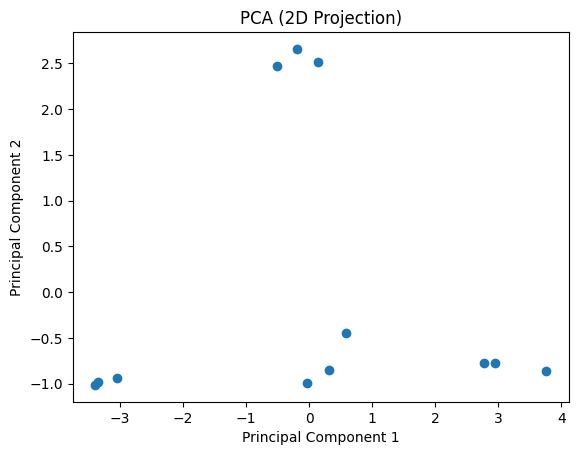

In [20]:
plt.figure()
plt.scatter(pca_df["PC1"], pca_df["PC2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (2D Projection)")
plt.show()


In [21]:
tsne = TSNE(
    n_components=2,
    perplexity=5,
    learning_rate=200,
    random_state=42
)

tsne_data = tsne.fit_transform(scaled_data)


In [22]:
tsne_df = pd.DataFrame(
    tsne_data,
    columns=["Dim1", "Dim2"]
)

tsne_df.head()


,Dim1,Dim2
0,65.355408,-207.965897
1,384.836639,133.341003
2,-80.934448,-204.770050
3,4.671983,289.723694
4,538.627014,9.576306


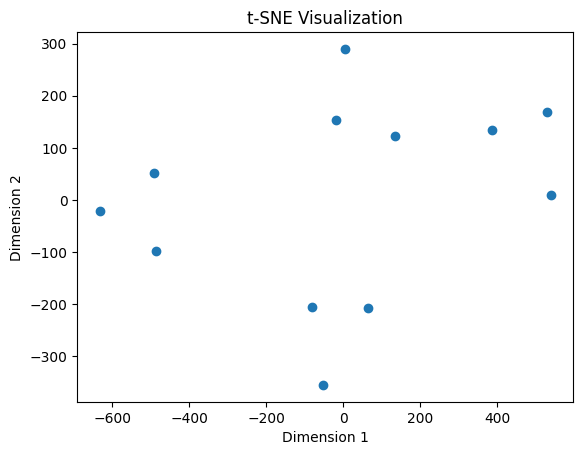

In [23]:
plt.figure()
plt.scatter(tsne_df["Dim1"], tsne_df["Dim2"])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE Visualization")
plt.show()
